In [1]:
import sys

sys.path.insert(0, '../..')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from lakey_client import LakeyClient
import pandas as pd
import seaborn as sns 

lakey = LakeyClient()

In [3]:
lakey.discover()

In [16]:
df = lakey.download(id='iot-1')

1907it [00:00, 3677.08it/s]                          


In [17]:
df.head()

,timestamp_client,property,value,source,year,month,day
0,2019-01-15T01:10:48.000Z,heating.circuits.0.sensors.temperature.supply/...,42.0,hg,2019,1,15
1,2019-01-15T08:41:39.000Z,heating.circuits.1.sensors.temperature.supply/...,30.3,hg,2019,1,15
2,2019-01-15T01:12:07.000Z,heating.circuits.0.sensors.temperature.supply/...,41.9,hg,2019,1,15
3,2019-01-15T08:44:32.000Z,heating.circuits.0.sensors.temperature.supply/...,47.5,hg,2019,1,15
4,2019-01-15T01:12:34.000Z,heating.circuits.0.sensors.temperature.supply/...,41.8,hg,2019,1,15


In [18]:
df.timestamp_client = pd.to_datetime(df.timestamp_client, infer_datetime_format=True)

In [19]:
df.groupby('property')['property'].count()

property
heating.circuits.0.sensors.temperature.supply/value      247230
heating.circuits.1.sensors.temperature.supply/value       41501
heating.dhw.sensors.temperature.hotWaterStorage/value     30941
heating.errors.active/entries                                 1
heating.errors.history/entries                                9
heating.sensors.temperature.outside/value                 34433
heating.sensors.temperature.return/value                  28966
Name: property, dtype: int64

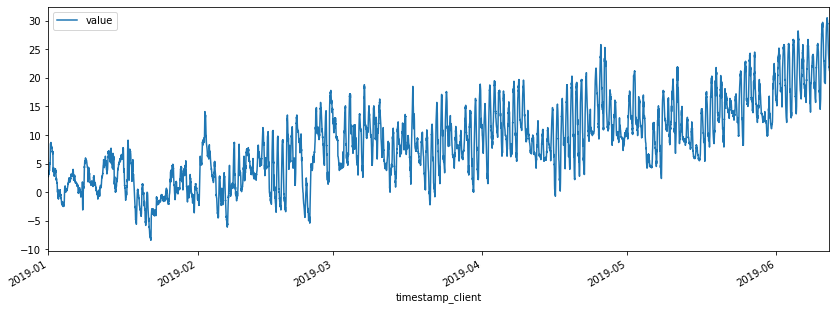

In [20]:
outside_temp_df = df[df['property'] == 'heating.sensors.temperature.outside/value']
outside_temp_df.value = outside_temp_df.value.astype(float)

outside_temp_df.plot(x='timestamp_client', y='value', figsize=(14, 5))